In [ ]:
print("height dataset")
print("Muhammad nauman part")

height dataset
Muhammad nauman part


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pickle

In [ ]:
# reading the dataset
file_path = "galton-stata11.tab"
df = pd.read_csv(file_path, delimiter='\t')

Epoch 1/100
18/18 [==============================] - 1s 18ms/step - loss: 1677.7156 - val_loss: 271.0502
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 69.4451 - val_loss: 53.1800
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 27.3993 - val_loss: 14.5418
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 14.5927 - val_loss: 12.4153
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 12.0661 - val_loss: 12.2082
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 11.9812 - val_loss: 12.3886
Epoch 7/100
18/18 [==============================] - 0s 11ms/step - loss: 12.0157 - val_loss: 12.2655
Epoch 8/100
18/18 [==============================] - 0s 13ms/step - loss: 12.0951 - val_loss: 12.2133
Epoch 9/100
18/18 [==============================] - 0s 12ms/step - loss: 12.0172 - val_loss: 12.5296
Epoch 10/100
18/18 [==============================] - 0s 11ms/step - loss: 11.9356 -

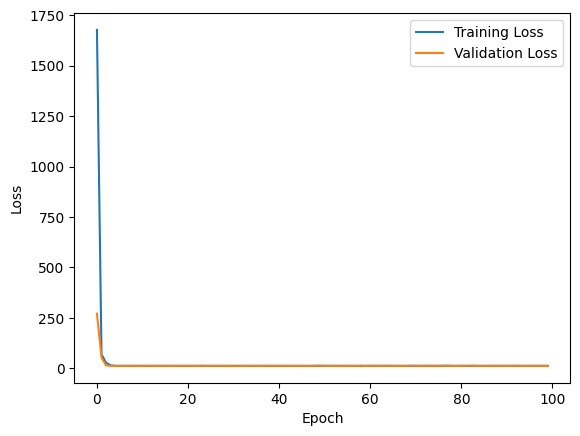

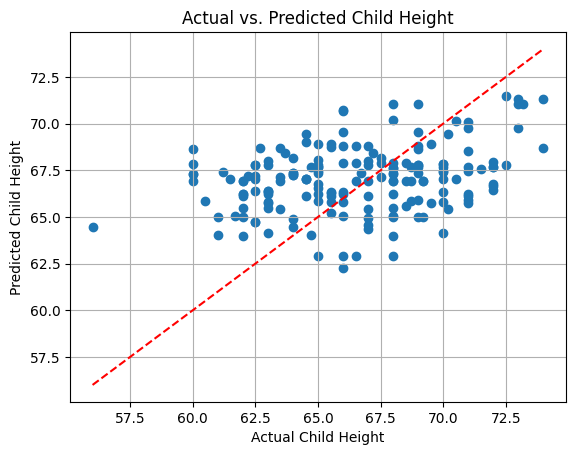

In [ ]:
X = df[['father', 'mother']].values

# Target variable: Child's height
y = df['height'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(2,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer with a single neuron for predicting the child's height
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Make predictions
y_pred = model.predict(X_test)

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the predicted vs. actual child heights
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual Child Height')
plt.ylabel('Predicted Child Height')
plt.title('Actual vs. Predicted Child Height')
plt.grid(True)
plt.show()


In [ ]:
model_pkl_file = "height_part.pkl"

In [ ]:
with open(model_pkl_file,'wb') as file:
  pickle.dump(model,file)